# Belarus Car Price Prdiction
The aim of this project is to predict the price of car in Belarus, by analyzing the car features such as brand, year, engine, fuel type, mileage, drive unit, color, segment. The project also aims to find out the set of the variables that has most impact on the **car** price.


# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading Data

In [2]:
url = 'https://raw.githubusercontent.com/SUKHMAN-SINGH-1612/Data-Science-Projects/main/Belarus%20Car%20Price%20Prediction/cars.csv'

In [3]:
df = pd.read_csv(url)
df.head(2)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B


# checking the number of rows and cols in the dataset

In [4]:
df.shape

(56244, 12)

# checking the data types of the cols

In [5]:
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

# remove unnecessary features which do not have that much impact on our target/dependent variable

In [6]:
df.drop(columns=['model','segment'],inplace=True)

In [7]:
df.head(2)

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive


# number of unique values in each row

In [8]:
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

# unique car models

In [9]:
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

as there are huge number of car models for the sake of analysis we can group them according to region/country where the are produced.using chatgpt:)

In [10]:
def carGrouper(model):
    model = model.lower()  # Convert the input model to lowercase for case-insensitive matching

    if model in ['gaz', 'aro', 'uaz', 'moskvich', 'wartburg', 'izh', 'raf', 'bogdan', 'lada (vaz)', 'luaz', 'zaz', 'ravon']:
        return 'Russian car brands'
    elif model in ['chery', 'geely', 'dongfeng', 'faw', 'great wall', 'byd', 'haval', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Chinese car brands'
    elif model in ['toyota', 'nissan', 'mitsubishi', 'honda', 'suzuki', 'daihatsu', 'hyundai', 'kia', 'lexus', 'isuzu', 'infiniti', 'acura', 'scion', 'datsun', 'tesla']:
        return 'Asian car brands'
    elif model in ['toyota', 'nissan', 'mitsubishi', 'honda', 'suzuki', 'subaru', 'lexus', 'infiniti', 'datsun']:
        return 'Japanese car brands'
    elif model in ['mazda', 'mg', 'renault', 'alfa romeo', 'audi', 'peugeot', 'volvo', 'fiat', 'porsche', 'bmw', 'mercedes-benz', 'seat', 'volkswagen', 'opel', 'skoda', 'citroen', 'mini', 'jaguar', 'land rover', 'bentley', 'rolls-royce', 'aston martin', 'lancia']:
        return 'European car brands'
    elif model in ['toyota', 'nissan', 'mitsubishi', 'honda', 'suzuki', 'daihatsu', 'hyundai', 'kia', 'lexus', 'isuzu', 'infiniti', 'acura', 'scion', 'datsun', 'tesla']:
        return 'American car brands'
    else:
        return 'others'


In [11]:
df['model_segment']=df['make'].apply(carGrouper)

In [12]:
df['model_segment'].value_counts()

European car brands    37075
Asian car brands       10541
others                  7503
Russian car brands       565
Japanese car brands      374
Chinese car brands       186
Name: model_segment, dtype: int64

# Descriptive stats for non categorical variable

In [13]:
df.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
priceUSD,56244.0,7415.456440,8316.959261,48.0,2350.0,5350.0,9807.5,235235.0
year,56244.0,2003.454840,8.144247,1910.0,1998.0,2004.0,2010.0,2019.0
mileage(kilometers),56244.0,244395.631020,321030.668382,0.0,137000.0,228500.0,310000.0,9999999.0
volume(cm3),56197.0,2104.860615,959.201633,500.0,1600.0,1996.0,2300.0,20000.0


# Descriptive stats for nn categorical variable

In [14]:
df.describe(include=np.object).transpose()

<ipython-input-14-11f9ba232f11>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object).transpose()


,count,unique,top,freq
make,56244,96,volkswagen,6861
condition,56244,3,with mileage,55278
fuel_type,56244,3,petrol,36405
color,56244,13,black,12385
transmission,56244,2,mechanics,36056
drive_unit,54339,4,front-wheel drive,38016
model_segment,56244,6,European car brands,37075


# **Exploratory Data Analysis(EDA)**
In order to understand the relationship between the target variable with the independent variables an **Exploratory Data Anaylysis** is required. This help us to show numerically as well as visually the the impact of independent variables on dependent variable

### Car produced in each region

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'European car brands'),
  Text(1, 0, 'Russian car brands'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Asian car brands'),
  Text(4, 0, 'Chinese car brands'),
  Text(5, 0, 'Japanese car brands')])

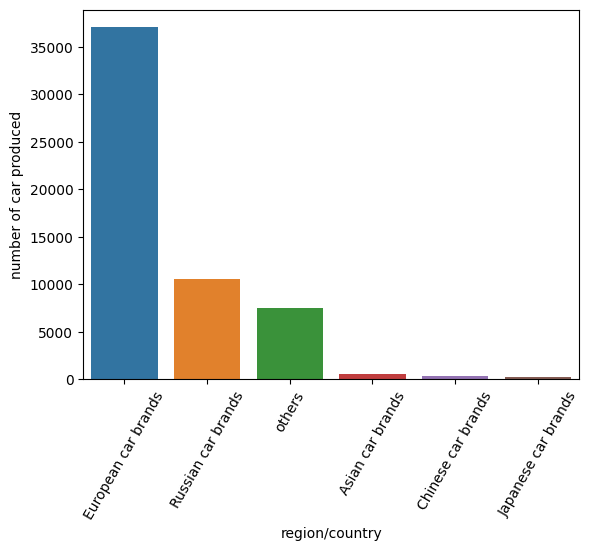

In [15]:
sns.barplot(x=df['model_segment'].unique(),y=df['model_segment'].value_counts())
plt.ylabel('number of car produced')
plt.xlabel('region/country')
plt.xticks(rotation=60)

#Avg price of car in each region

In [16]:
df.groupby('model_segment').agg({'model_segment':'first','priceUSD':'mean'})

,model_segment,priceUSD
model_segment,,
Asian car brands,Asian car brands,8919.869462
Chinese car brands,Chinese car brands,6632.279570
European car brands,European car brands,7315.999811
Japanese car brands,Japanese car brands,7936.296791
Russian car brands,Russian car brands,2657.028319
others,others,6145.127949


## categorical variable distribution

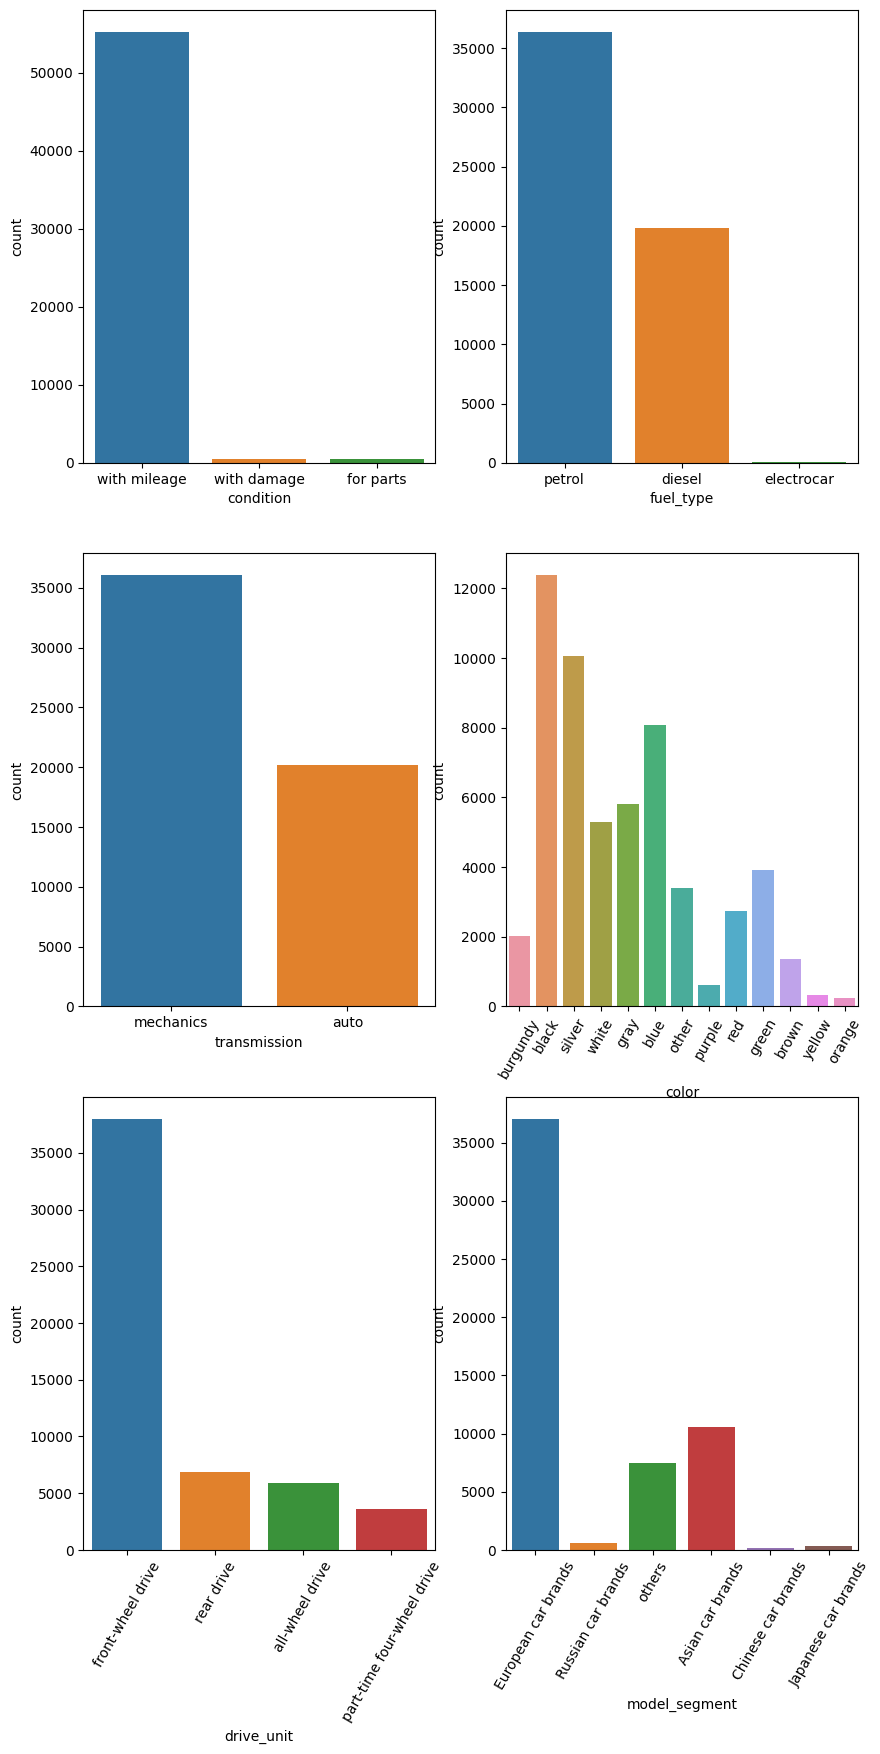

In [17]:
fig, ax = plt.subplots(3,2,figsize=(10,20))
sns.countplot(x='condition',data=df, ax=ax[0,0])
sns.countplot(x='fuel_type',data=df, ax=ax[0,1])
sns.countplot(x='transmission',data=df, ax=ax[1,0])
sns.countplot(x='color',data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x',rotation=60)
sns.countplot(x='drive_unit',data=df, ax=ax[2,0])
ax[2,0].tick_params(axis='x',rotation=60)
sns.countplot(x='model_segment',data=df, ax=ax[2,1])
ax[2,1].tick_params(axis='x',rotation=60)



# Continuous Variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

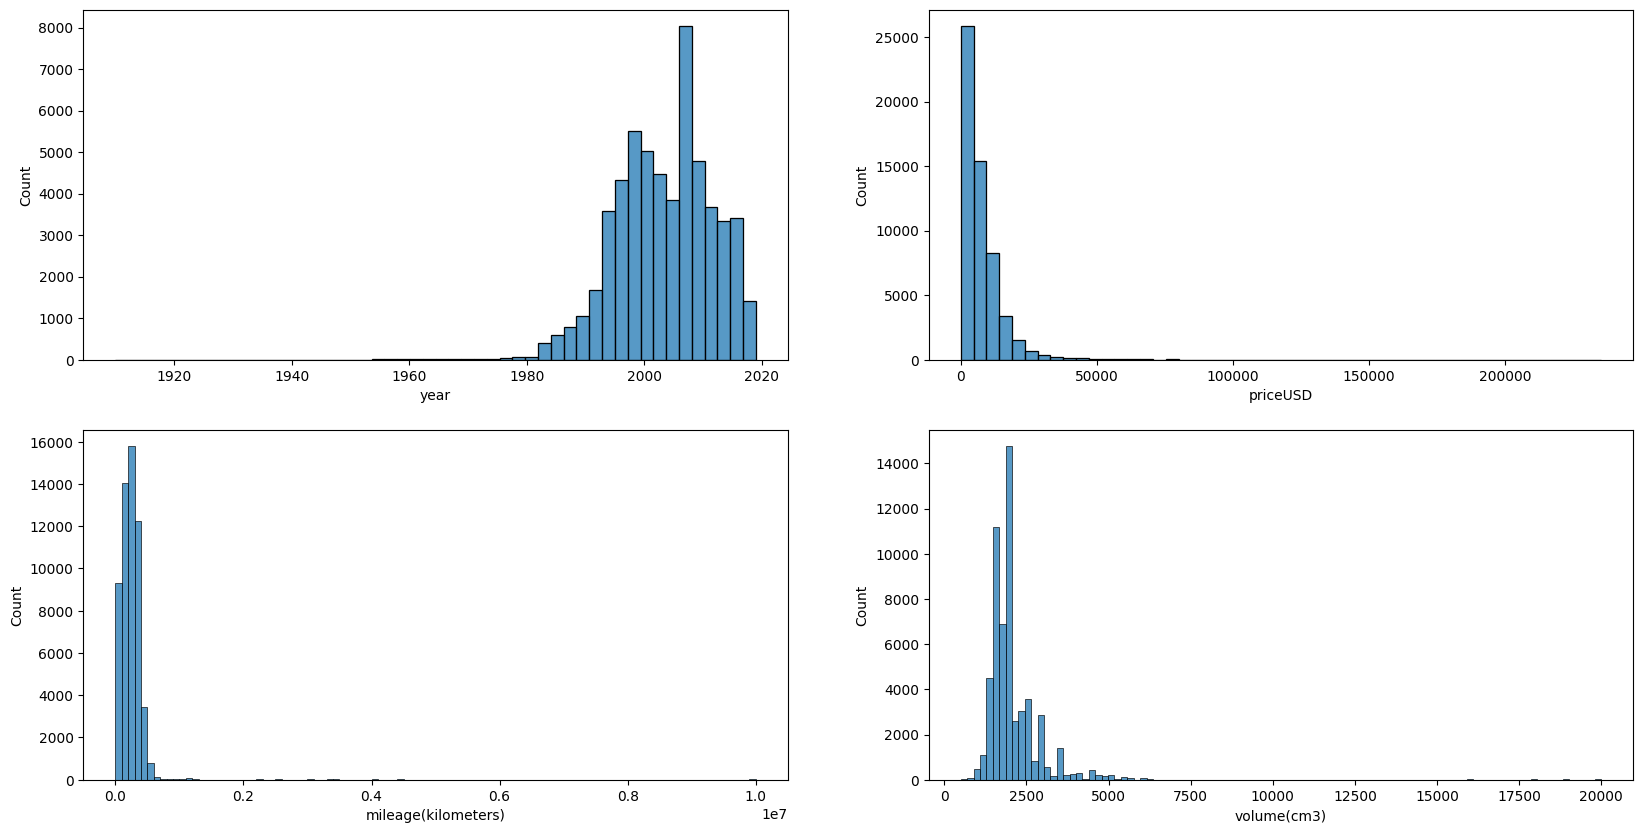

In [18]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
sns.histplot(df['year'],ax=ax[0,0],bins=50)
sns.histplot(df['priceUSD'],ax=ax[0,1],bins=50)
sns.histplot(df['mileage(kilometers)'],ax=ax[1,0],bins=100)
sns.histplot(df['volume(cm3)'],ax=ax[1,1],bins=100)

## Comparision between Independent Variables

Price VS Model

In [19]:
top5=df.groupby('make').agg({'make':'first','priceUSD':'mean'}
                       ).sort_values(by='priceUSD',ascending=False).head(5)

Text(0, 0.5, 'Avg Price')

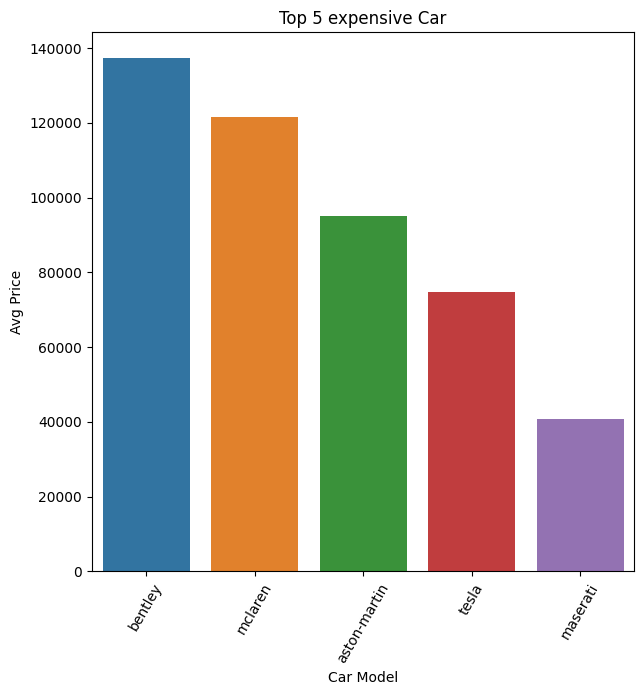

In [20]:
plt.figure(figsize=(7,7))
sns.barplot(x=top5['make'],y=top5['priceUSD'])
plt.xticks(rotation=60)
plt.title('Top 5 expensive Car')
plt.xlabel('Car Model')
plt.ylabel('Avg Price')

# Price vs Condition

(1980.0, 2020.0)

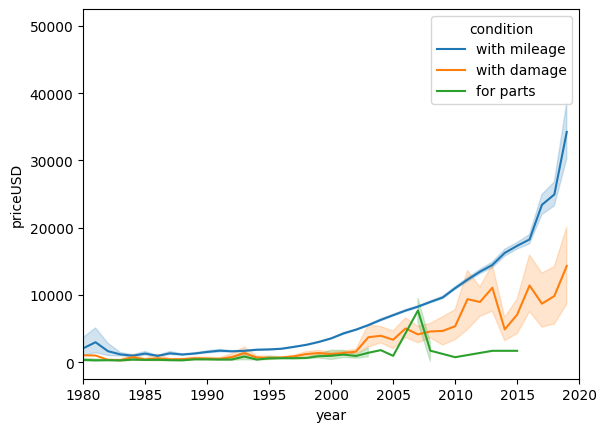

In [21]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='condition')
plt.xlim(1980,2020)

cars with mileage is expensive than other two types

#Price vs Transmission

In [22]:
 pd.DataFrame((df['transmission']=='auto') & (df['year']<1977 )).value_counts()

False    56244
dtype: int64

There were no cars with auto transmission before 1997

(1980.0, 2020.0)

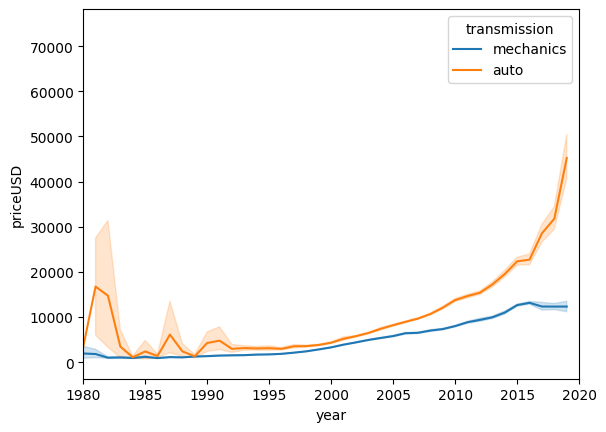

In [23]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='transmission')
plt.xlim(1980,2020)

price of cars with mechanics transmission is increasing exponentially from 2015 to 2020

#Price vs Fuel Type

<Axes: xlabel='year', ylabel='priceUSD'>

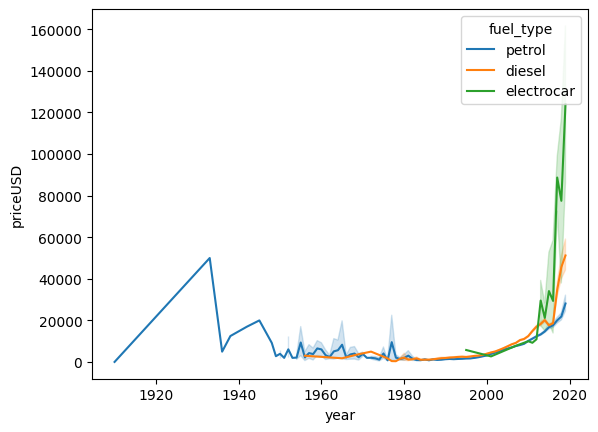

In [24]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='fuel_type')

# Price vs Drive Unit

<Axes: xlabel='year', ylabel='priceUSD'>

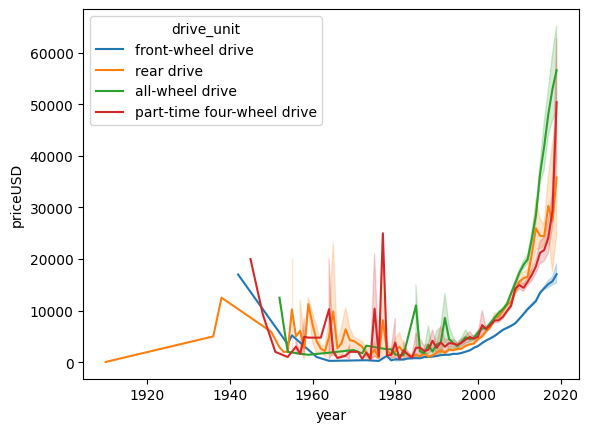

In [25]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='drive_unit')

# Price vs Production-Region

(2015.0, 2020.0)

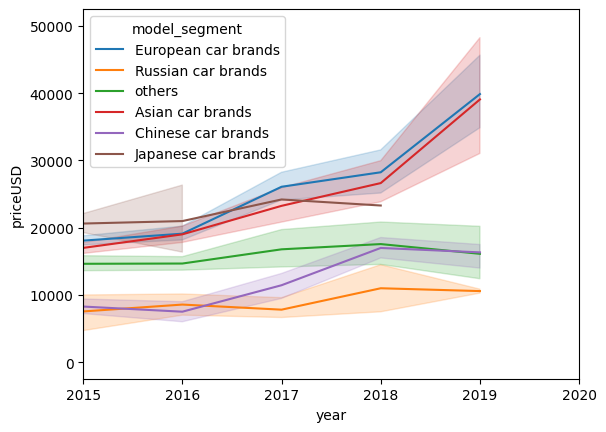

In [26]:
sns.lineplot(x='year',y='priceUSD',data=df,hue='model_segment')
plt.xlim(2015,2020)

## Data Preprocessing Before Model Developement

In [27]:
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
model_segment             0
dtype: int64

Replace **null** values with mean volume

In [28]:
avg_vol = df['volume(cm3)'].mean()
df['volume(cm3)'].replace(np.nan,avg_vol,inplace=True)

In [29]:
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)               0
color                     0
transmission              0
drive_unit             1905
model_segment             0
dtype: int64

In [30]:
df['drive_unit'].value_counts()

front-wheel drive             38016
rear drive                     6836
all-wheel drive                5890
part-time four-wheel drive     3597
Name: drive_unit, dtype: int64

**drive_unit** is a categorical variable. we can replace **null** values for that col with a category with highst count. In the case **front-wheel drive

In [31]:
df['drive_unit'].replace(np.nan,'front-wheel drive',inplace=True)

In [32]:
df.isnull().sum()

make                   0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
model_segment          0
dtype: int64

so now I do not have any null values.

As we have grouped model name accourding to region where they were produced. now we not not need **make** col any more.

In [33]:
df.drop(columns='make',inplace=True)

## Label encoding for categorical data(converting categorical values with dummy numerical values. that is easy understand for machine)


In [34]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['condition','fuel_type','transmission','color','drive_unit','model_segment']

In [35]:
le = LabelEncoder()
for col in cat_cols:
  le.fit(df[col])
  df[col]=le.transform(df[col])
  print(df[col].unique())

[2 1 0]
[2 0 1]
[1 0]
[ 3  0 10 11  4  1  7  8  9  5  2 12  6]
[1 3 0 2]
[2 4 5 0 1 3]


# Showing Correlation with **Heatmap Matrix**

<Axes: >

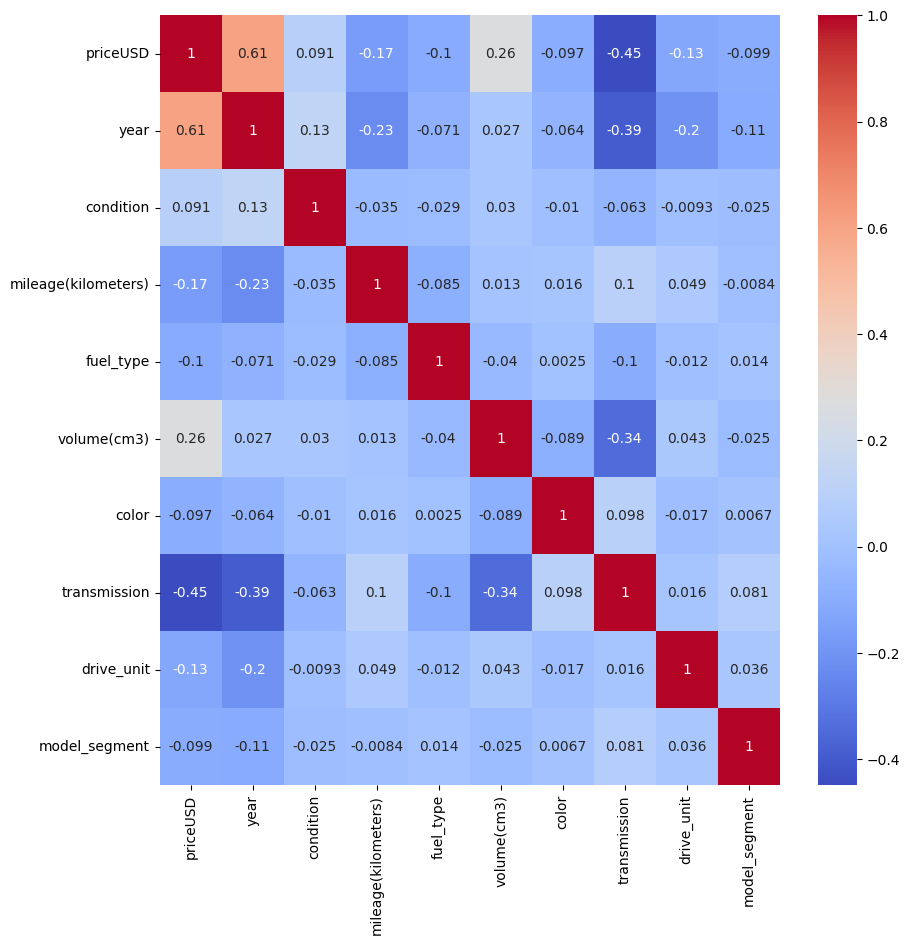

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Removing Outlier

In [37]:
from scipy import stats


# checking for outlier using box plot

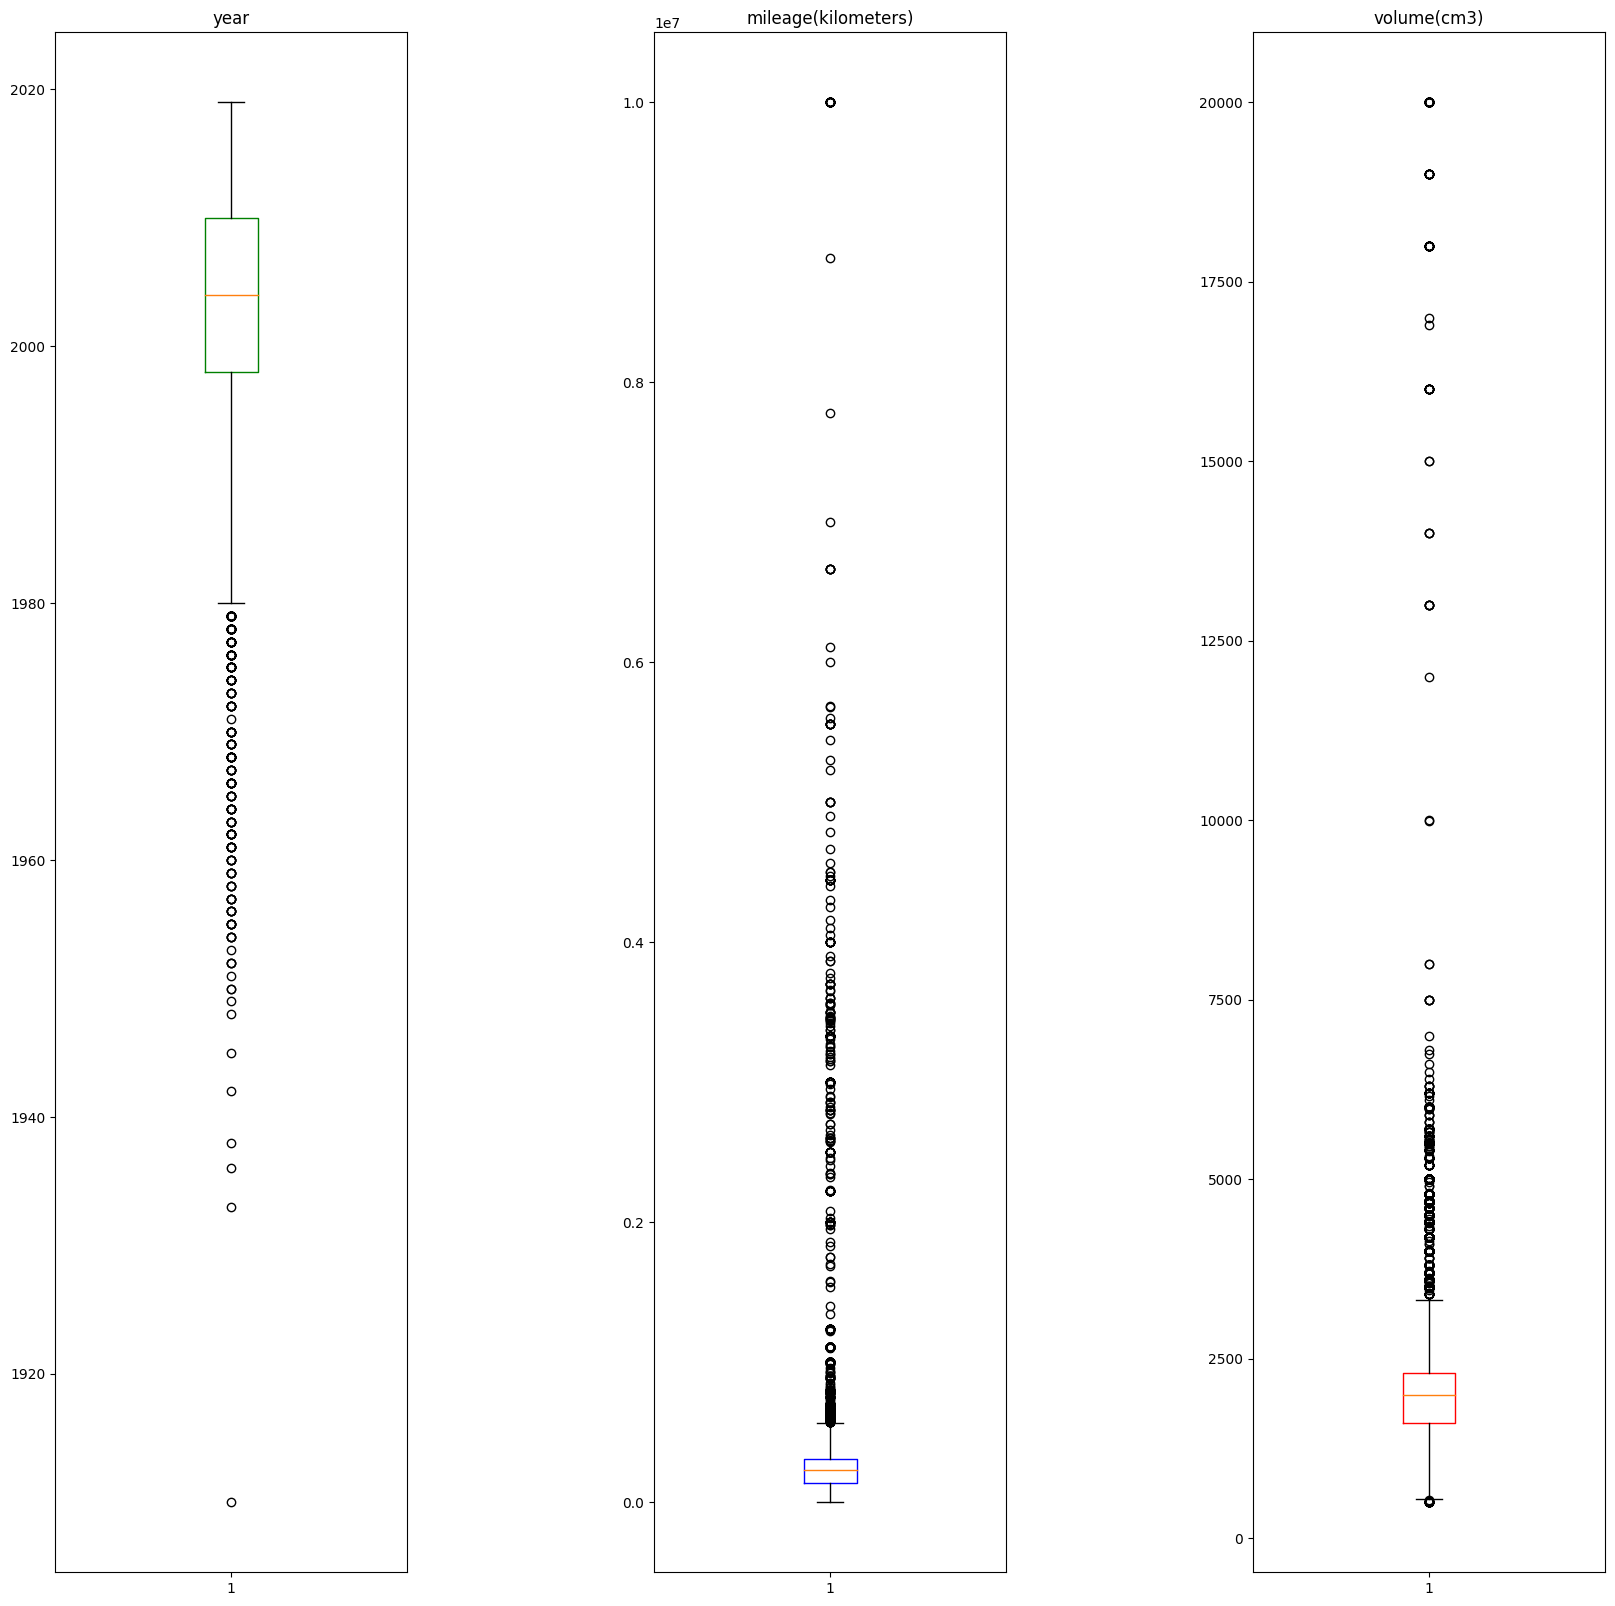

In [38]:
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']
color=['green','blue','red']
fig,ax=plt.subplots(1,3,figsize=(20,20))
plt.subplots_adjust(wspace=0.7)
for i in range(3):
     ax[i].boxplot(x=df[cols[i]],vert=True,boxprops=dict(color=color[i]))
     ax[i].set_title(cols[i])


In [40]:
z=np.abs(stats.zscore(df))
z.head(3)

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,model_segment
0,0.230309,0.558087,0.125063,0.256662,0.737872,0.630857,0.460945,0.748269,0.258211,0.034528
1,0.248345,0.680874,0.125063,0.387492,0.737872,0.839453,1.177453,0.748269,0.258211,0.034528
2,0.049953,0.680874,0.125063,0.571276,0.737872,0.630857,1.210907,1.336417,0.258211,0.034528


In [41]:
threshold=3
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']
df=df[(z<3).all(axis=1)]
df.head(3)

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,model_segment
0,5500,2008,2,162000.0,2,1500.0,3,1,1,2
1,5350,2009,2,120000.0,2,1300.0,0,1,1,2
2,7000,2009,2,61000.0,2,1500.0,10,0,1,2


# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['priceUSD']),df['priceUSD'],test_size=0.25,random_state=100)


In [43]:
print(X_train.shape,X_test.shape)

(40032, 9) (13344, 9)


# Model Building
Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

## Hypertuning using **GridSearchCV**

In [45]:
from sklearn.model_selection import GridSearchCV
params={
    'max_depth':[2,4,6,8],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,3,4],
    'max_features':['auto','sqrt','log2'],
    'random_state':[0,42]
}
grid = GridSearchCV(
    dtr, param_grid=params,cv=5,verbose=1,n_jobs=-1
)
grid.fit(X_train,Y_train)
print(grid.best_params_)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Now we can see on which parameters we can get the best score from ``DecisionTreeRegressor()```

In [48]:
from sklearn.metrics import multilabel_confusion_matrix
dtr = DecisionTreeRegressor(max_depth=8,max_features='auto',min_samples_leaf=4,min_samples_split=2)
dtr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4)

In [49]:
dtr.score(X_test, Y_test)

0.8607498938643053

In [60]:
y_pred=dtr.predict(X_test)

## Model Evaluation

In [62]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
print("R2 score: ", r2_score(Y_test, y_pred))
print('Mean Squared Error: ',mean_squared_error(Y_test, y_pred))
print('Mean absolute error: ',mean_absolute_error(Y_test, y_pred))
print("Root mean Squared error: ",np.sqrt(mean_squared_error(Y_test, y_pred)))

R2 score:  0.8607498938643053
Mean Squared Error:  4547970.004120704
Mean absolute error:  1422.1232640548767
Root mean Squared error:  2132.5970093106444


## Feature Importance

In [71]:
feat_df=pd.DataFrame({'Features':X_train.columns,'Importance':dtr.feature_importances_})
feat_df.sort_values(by='Importance',ascending=False,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'volume(cm3)'),
  Text(2, 0, 'fuel_type'),
  Text(3, 0, 'model_segment'),
  Text(4, 0, 'transmission'),
  Text(5, 0, 'drive_unit'),
  Text(6, 0, 'mileage(kilometers)'),
  Text(7, 0, 'color'),
  Text(8, 0, 'condition')])

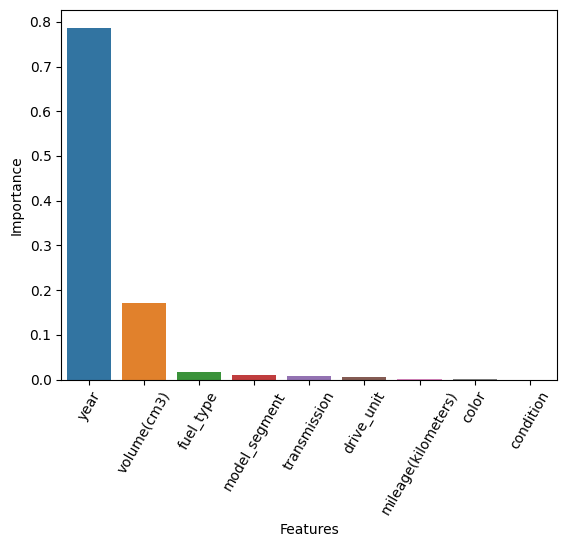

In [72]:
sns.barplot(data=feat_df, x='Features',y='Importance')
plt.xticks(rotation=60)